In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('FIFA_data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df.shape

(18207, 89)

In [4]:
drop=['Flag','Photo','Club Logo']
df.drop(drop,inplace=True,axis=1)
df.head()

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 86 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Real Face                   18159 non-null o

In [5]:
df.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

In [35]:
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'], inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Club'].fillna('No Club', inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Body Type'].fillna('Normal', inplace = True)
df['Loaned From'].fillna('None', inplace = True)


In [36]:
df.isnull().sum()

Unnamed: 0                     0
ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                           0
Club Logo                      0
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                     48
Skill Moves                    0
Work Rate                     48
Body Type                      0
Real Face                     48
Position                      60
Jersey Number                 60
Joined                      1553
Loaned From                    0
Contract Valid Until         289
Height                        48
Weight                        48
LS                          2085
ST                          2085
          

In [6]:
df['Nationality'].nunique()

164

In [7]:
mn=df.groupby('Nationality')['ID'].count()
mn.sort_values(ascending=False)

Nationality
England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
Brazil                   827
Italy                    702
Colombia                 618
Japan                    478
Netherlands              453
Sweden                   397
China PR                 392
Chile                    391
Republic of Ireland      368
Mexico                   366
United States            353
Poland                   350
Norway                   341
Saudi Arabia             340
Denmark                  336
Korea Republic           335
Portugal                 322
Turkey                   303
Austria                  298
Scotland                 286
Belgium                  260
Australia                236
Switzerland              220
Uruguay                  149
Senegal                  130
                        ... 
Uzbekistan                 2
Eritrea                    2
Nicaragua                  2
Ch

In the give dataset maximum player are from england 1662. With Followed by Germany 1198

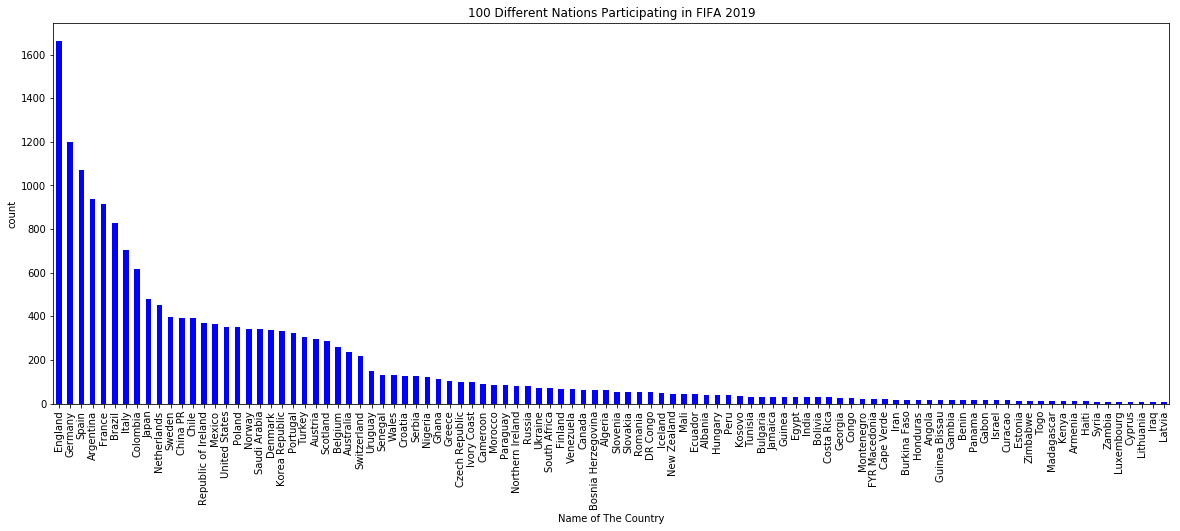

In [15]:

df['Nationality'].value_counts().head(100).plot.bar(color = 'Blue', figsize = (20, 7))
plt.title('100 Different Nations Participating in FIFA 2019')
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

In [26]:
df.groupby('Club').count()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Club,,,,,,,,,,,,,,,,,,,,,
SSV Jahn Regensburg,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,25
1. FC Heidenheim 1846,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
1. FC Kaiserslautern,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
1. FC Köln,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
1. FC Magdeburg,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,24
1. FC Nürnberg,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,25
1. FC Union Berlin,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,25
1. FSV Mainz 05,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,31
AC Ajaccio,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,22


In [42]:
def club(x):
    return df[df['Club'] == x][['Name','Jersey Number','Position','Overall','Nationality','Age','Wage',
                                    'Value','Contract Valid Until']]

club('Manchester United').head()

,Name,Jersey Number,Position,Overall,Nationality,Age,Wage,Value,Contract Valid Until
3,De Gea,1.0,GK,91,Spain,27,€260K,€72M,2020
45,P. Pogba,6.0,RDM,87,France,25,€210K,€64M,2021
47,R. Lukaku,9.0,ST,87,Belgium,25,€230K,€62.5M,2022
93,A. Sánchez,7.0,RW,85,Chile,29,€215K,€37.5M,2022
116,A. Martial,11.0,LW,84,France,22,€165K,€42.5M,2019


In [43]:
def country(x):
    return df[df['Nationality'] == x][['Name','Overall','Potential','Position']]

# let's check the Indian Players 
country('India').head()

,Name,Overall,Potential,Position
8605,S. Chhetri,67,67,LS
10011,S. Jhingan,65,71,RCB
12598,J. Lalpekhlua,63,64,RS
12811,G. Singh Sandhu,63,68,GK
13508,A. Edathodika,62,62,LCB


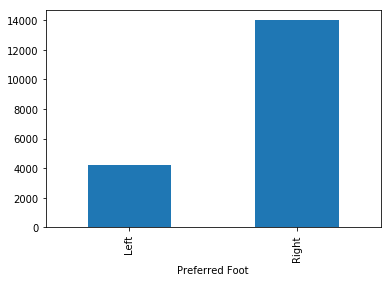

In [46]:
df.groupby('Preferred Foot')['ID'].count().plot.bar()

## Right Foot Preffered Over Left foot by Players

In [69]:
df.groupby('Age')['Name','Nationality'].nunique()

,Name,Nationality
Age,,
16,42,19
17,289,41
18,729,69
19,1021,77
20,1235,87
21,1417,90
22,1334,99
23,1320,94
24,1352,108


In [64]:
dy=df[df['Age']==16]
dy.groupby('Age')['Nationality'].max()

Age
16    United States
Name: Nationality, dtype: object

In [71]:
dy=df[df['Age']==45]
dy.groupby('Age')['Name','Nationality'].max()

,Name,Nationality
Age,,
45,O. Pérez,Mexico


### In Fifa Most Of The Youngest Player are form United State of 16 year old And O.Perez is the oldest player in FiFa from Mexico of  Age 45

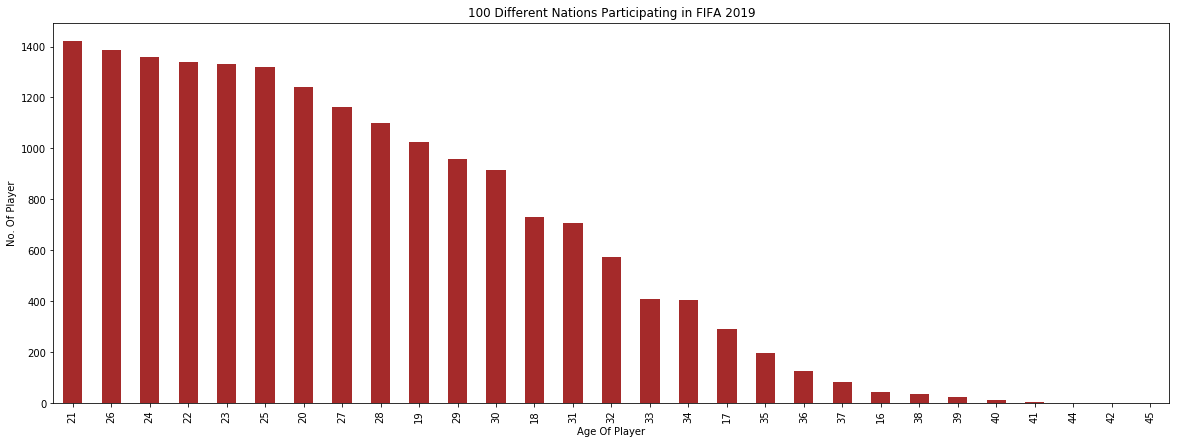

In [65]:

df['Age'].value_counts().sort_values(ascending=False).plot.bar(color = 'Brown', figsize = (20, 7))
plt.title('100 Different Nations Participating in FIFA 2019')
plt.xlabel('Age Of Player')
plt.ylabel('No. Of Player')
plt.show()

In [114]:
(df.groupby('Value')['Name'].count()).sort_values(ascending=False)

Value
€1.1M     431
€375K     372
€425K     354
€325K     351
€450K     343
€525K     338
€350K     325
€1.2M     324
€400K     323
€1M       318
€475K     296
€500K     294
€600K     293
€550K     285
€675K     270
€575K     261
€1.3M     260
€0        252
€725K     241
€300K     240
€625K     238
€650K     225
€1.4M     221
€750K     219
€160K     206
€700K     203
€180K     202
€130K     201
€140K     200
€825K     197
         ... 
€64M        1
€67M        1
€68M        1
€72M        1
€76.5M      1
€93M        1
€78M        1
€41M        1
€36M        1
€63M        1
€55M        1
€53.5M      1
€51.5M      1
€53M        1
€54M        1
€83.5M      1
€28M        1
€81M        1
€46M        1
€56.5M      1
€40M        1
€80M        1
€58M        1
€45.5M      1
€59M        1
€61M        1
€38.5M      1
€62.5M      1
€62M        1
€44.5M      1
Name: Name, Length: 217, dtype: int64

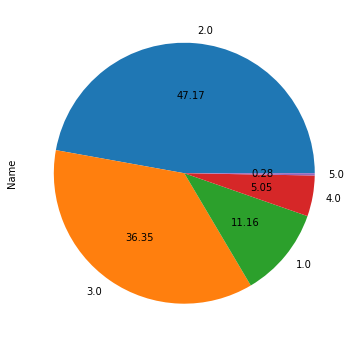

In [74]:
(df.groupby('Skill Moves')['Name'].count()).sort_values(ascending=False).plot.pie(autopct = '%.2f', figsize= (6,6))

## Skill Distribution Of FiFa 2019 Players

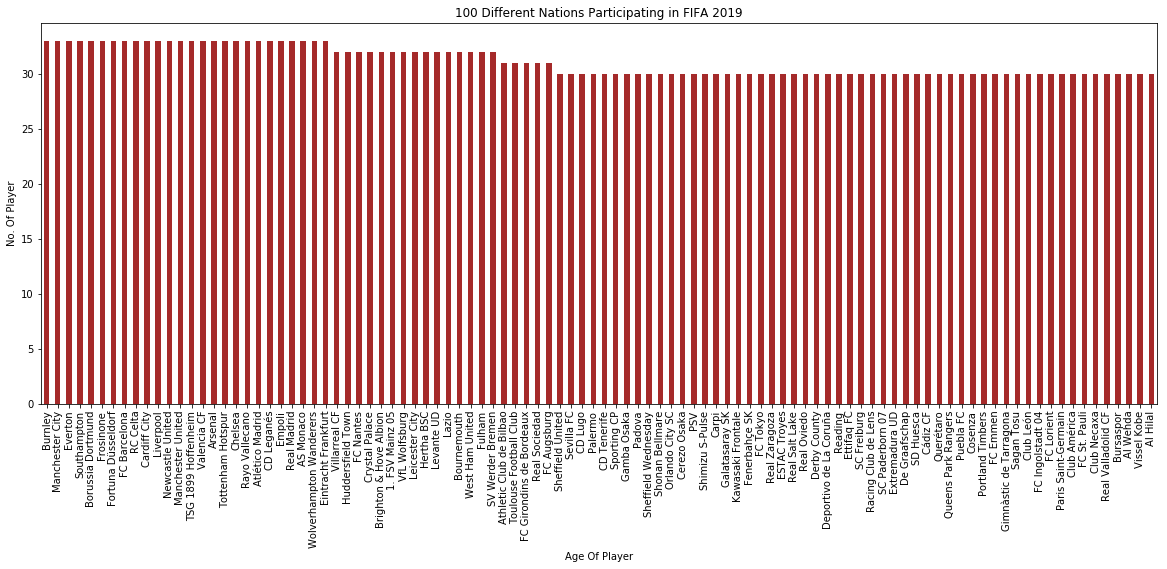

In [93]:

df.groupby('Club')['Name'].count().sort_values(ascending=False).head(100).plot.bar(color = 'Brown', figsize = (20, 7))
plt.title('100 Different Club Participating in FIFA 2019')
plt.xlabel('No Of Player')
plt.ylabel('Name Of Club')
plt.show()

### CLub With Most Number Of Player In FiFa 19

sns.heatmap(df.corr(),annot=True)